Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) designed to handle sequential data while overcoming the vanishing gradient problem that traditional RNNs face

How LSTM works :
LSTM networks introduce a memory cell that retains information over extended periods, allowing them to learn long-term dependencies. They achieve this using three key gates.
  - Forget Gate: Determines which information should be discarded from the memory cell.
  - Input Gate: Decides what new information should be added to the memory cell.
  - Output Gate: Controls what information is passed to the next time step.


Stock Prediction using LSTM : The LSTM (Long Short-Term Memory) model plays as crucial and central role in predicting stock prices based on the historical data.

Benefits :
  - Learns patterns like trends and seasonality.
  - Can be fine-tuned with additional data like sentiment.
  - Those assume stationary or fixed trends, LSTM handles nonlinear trends better.

Limitations:
  - LSTMs can easily overfit if trained too long or on noisy data.
  - Does not understand real world events.
  - Sensetive to hyper parameters.
  - Lag in predictions.
  - Requires large and clean data.
  - Hard to incorporate multiple data source effectively.

1. Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2. Here we are fetching the historical stock data for Apple Inc using yfinance Library(5 years of stock data) and also preparing the data set for stock price prediction.

While chosing the feature, we have selected five key stock market attributes:

  - Open : Price at market open
  - High : Highest price reached during the day
  - Low : Lowest price during the day
  - Close : Price at market close
  - Volume : Number of shares traded

In [ ]:
ticker='AAPL'
df = yf.download(ticker, period = '5y')
df = df[['Open','High','Low','Close','Volume']]
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


3. Here we are applying MinMax scaling to our data set ensuring that all the feature values are normalized between 0 and 1.

In [ ]:
scaler= MinMaxScaler()
scaled_data = scaler.fit_transform(df.values)

4. Here we are creating sequence as it is an important step for preparing the data for models like LSTMs that rely on temporal dependencies because :
  - It helps in capturing the historical patterns.
  - It helps in structuring data for LSTM inputs.
  - It helps in preventing the data leakage.
  - Improving model performance.
  

In [ ]:
def create_sequences(data, time_step=60):
  x,y = [],[]
  for i in range(time_step, len(data)):
    x.append(data[i-time_step:i])
    y.append(data[i, 3])
  return np.array(x), np.array(y)

time_step=60
x,y = create_sequences(scaled_data, time_step)

5. Here we are spliting the Data into Train and test sets

In [ ]:
train_size = int(len(x)*0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


6. Here we initialize our model (LSTM) on our scaled stock market data.

In [ ]:
model = Sequential()
model.add(LSTM(units= 50, return_sequences=False, input_shape=(x.shape[1], x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

7. Here we are Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.7502e-04 - val_loss: 0.0014
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.4230e-04 - val_loss: 0.0018
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.6513e-04 - val_loss: 0.0014
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.1641e-04 - val_loss: 0.0014
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.0549e-04 - val_loss: 0.0013
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.2657e-04 - val_loss: 0.0014
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 4.8207e-04 - val_loss: 0.0013
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.1637e-04 - val_loss: 0.0013
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.5888e-04 - val_loss: 0.0014
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.7946e-04 - val_loss: 0.0012
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.6555e-04 - val_loss: 0.0013
Epoch 12/20
30/30 ━

8. Here we make the predictions based on our split and the model after we did the min max scaling.

In [ ]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


9. Here we reconstruct arrays for inverse scaling as it helps in restoring the predicted and actual values into their original structure as it will help us in preparing for inverse scaling.

In [ ]:
predicted_full = np.zeros((len(y_pred), scaled_data.shape[1]))
actual_full = np.zeros((len(y_test), scaled_data.shape[1]))

predicted_full[:, 3]= y_pred[:,0]
actual_full[:, 3] = y_test.flatten()

10. Inverse scale the data is required because this model is trained on scaled data, and predictions need to be converted back to their original scale for meaningful interpretation.

In [ ]:
predicted_prices = scaler.inverse_transform(predicted_full)[:,3]
actual_prices = scaler.inverse_transform(actual_full)[:,3]

11. Here we are creating visual comparison between actual and predicted stock prices using matplotlib

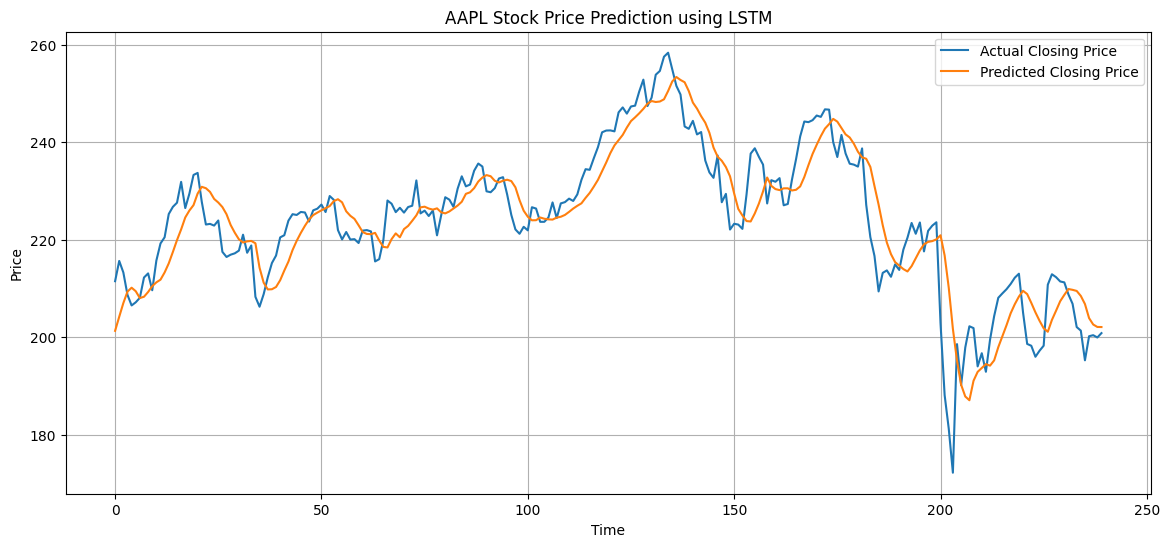

In [ ]:
plt.figure(figsize = (14,6))
plt.plot(actual_prices, label = 'Actual Closing Price')
plt.plot(predicted_prices, label = 'Predicted Closing Price')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

12. Here we used different models to evaluate the model

In [ ]:
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("📊 Model Evaluation Metrics:")
print(f"MAE  = {mae:.4f}")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

📊 Model Evaluation Metrics:
MAE  = 5.2416
MSE  = 46.2534
RMSE = 6.8010
R²   = 0.7869


##Conclusion

1. MAE = 5.2416
  - It means that the predictions are deviated by about 5.24 units from actual values.
  - Should be as low as possible, close to 0.
  - If price range from 100 to 1000 the a score of 5 to 10 is acceptable
2. MSE = 46.2534
  - Here we can see that the larger errors are penalized.
  - It helps in minimizing the large deviations but is sensitive to outliers.
  - The value for the MSE should be low but it depends on the data set.

3. RMSE = 6.8010
 - RMSE is the square root of the MSE making it easier to interpret.
 - Lower values indicate the better accuracy.

4. R2 Score = 0.7869
  - This means that the 78.69% of the variance in actual price is explained by the model.
  - A score closer to 1 is better such as (0.75 - 0.95).
  - A score closer to 0 suggests poor predictions while negative values indicate that the model is worse than a naive baseline.

### Question : Why we have not used a simple **percentage** to check the accuracy of the model above ?

#### Answer : The reason is simple because unlike classification task where **"Accuracy"** is straight forward like (95%) or something like that, in **Regression** problems we usually don't talk about the accuracy in percentage as here we are talking about the **continuous** values (in this case it is the stock price) and not the classes.